In [1]:
# ==============================
# 🎵 Spotify Trends Analyzer
# Autor: Sergio Alcaide
# Análisis exploratorio de canciones de Spotify
# ==============================

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)



In [2]:
# ==============================
# Cargar dataset
# ==============================

# Asegúrate de que el archivo esté en la carpeta data/
df = pd.read_csv("data/SpotifyFeatures.csv", encoding="latin1")

# Mostrar las primeras filas para verificar que cargó correctamente
df.head()


,ï»¿genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fÃ©es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# ==============================
# Selección de columnas relevantes
# ==============================

# Seleccionamos solo las columnas que vamos a usar
columns = ["track_name", "artist_name", "popularity", "danceability", "energy", "valence", "tempo"]
df = df[columns].dropna()

# Renombrar columnas para mayor claridad
df.rename(columns={
    "track_name": "Canción",
    "artist_name": "Artista",
    "popularity": "Popularidad",
    "danceability": "Bailabilidad",
    "energy": "Energía",
    "valence": "Felicidad",
    "tempo": "Tempo"
}, inplace=True)

# Verificamos los cambios
df.head()


,Canción,Artista,Popularidad,Bailabilidad,Energía,Felicidad,Tempo
0,C'est beau de faire un Show,Henri Salvador,0,0.389,0.910,0.814,166.969
1,Perdu d'avance (par Gad Elmaleh),Martin & les fÃ©es,1,0.590,0.737,0.816,174.003
2,Don't Let Me Be Lonely Tonight,Joseph Williams,3,0.663,0.131,0.368,99.488
3,Dis-moi Monsieur Gordon Cooper,Henri Salvador,0,0.240,0.326,0.227,171.758
4,Ouverture,Fabien Nataf,4,0.331,0.225,0.390,140.576


In [4]:
# ==============================
# Top 10 canciones más populares
# ==============================

# Eliminar duplicados considerando la combinación de Canción y Artista
df_unique = df.drop_duplicates(subset=["Canción", "Artista"])

# Obtener top 10 de las canciones únicas
top10 = df_unique.sort_values("Popularidad", ascending=False).head(10)

# Mostrar tabla en notebook
top10[["Canción", "Artista", "Popularidad"]]

,Canción,Artista,Popularidad
9027,7 rings,Ariana Grande,100
86951,Wow.,Post Malone,99
9026,"break up with your girlfriend, i'm bored",Ariana Grande,99
66643,Con Calma,Daddy Yankee,98
9037,Sweet but Psycho,Ava Max,97
107810,Dancing With A Stranger (with Normani),Sam Smith,97
86953,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,97
9028,Without Me,Halsey,97
107875,Calma - Remix,Pedro CapÃ³,97
107812,Happier,Marshmello,97


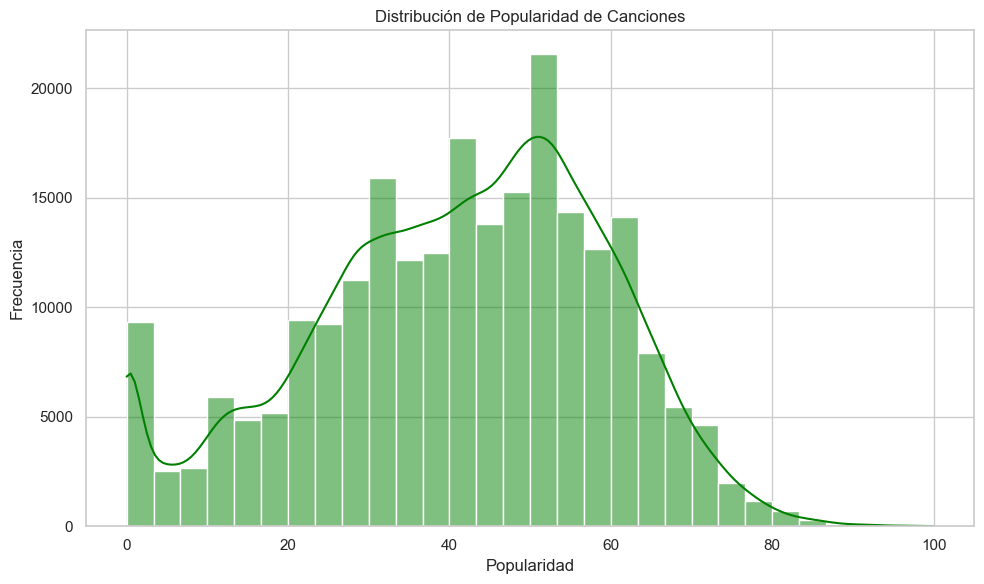

In [5]:
# ==============================
# Distribución de popularidad de todas las canciones
# ==============================

plt.figure(figsize=(10,6))
sns.histplot(df["Popularidad"], bins=30, kde=True, color="green")
plt.title("Distribución de Popularidad de Canciones")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()



C:\Users\sergi\AppData\Local\Temp\ipykernel_23844\2672184813.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


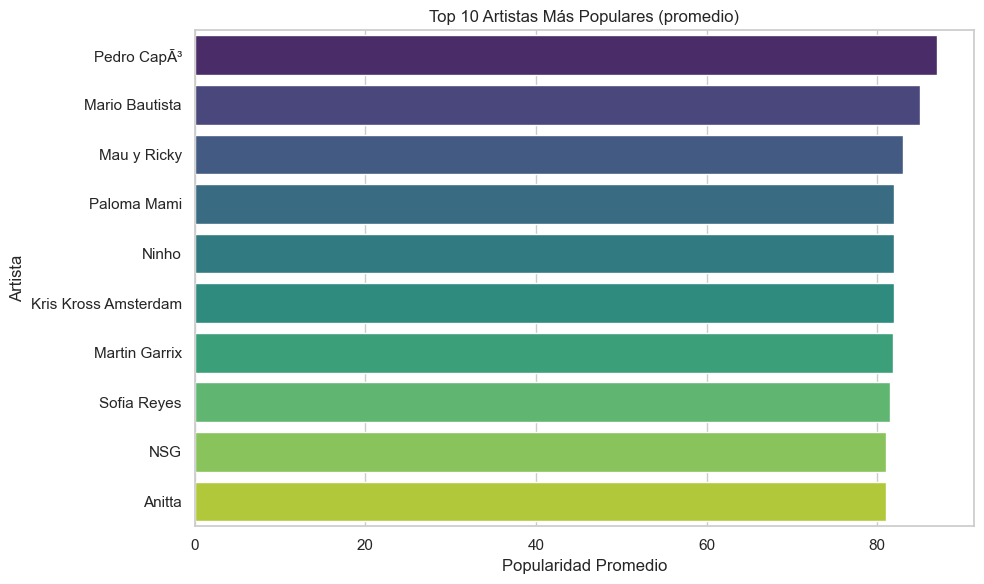

In [6]:
# ==============================
# Top 10 artistas más populares (promedio de popularidad)
# ==============================

# Agrupamos por artista y calculamos la popularidad promedio
top_artistas = df.groupby("Artista")["Popularidad"].mean().sort_values(ascending=False).head(10).reset_index()

# Mostrar tabla
top_artistas

# Gráfico de barras horizontal de los artistas más populares
plt.figure(figsize=(10,6))
sns.barplot(
    x="Popularidad",
    y="Artista",
    data=top_artistas,
    palette="viridis"
)
plt.title("Top 10 Artistas Más Populares (promedio)")
plt.xlabel("Popularidad Promedio")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()




In [7]:
# ==============================
# 📊 Observaciones finales - Top artistas y canciones
# ==============================

# Cargar CSV con codificación segura y limpiar encabezados
df = pd.read_csv("data/SpotifyFeatures.csv", encoding="utf-8-sig")
df.columns = df.columns.str.strip()  # elimina espacios o caracteres invisibles

# Eliminar posibles duplicados exactos (por si el dataset tiene repeticiones)
df = df.drop_duplicates()

# ==============================
# 🎤 Top 5 artistas más populares (por promedio de popularidad)
# ==============================
top_artistas = (
    df.groupby("artist_name")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# ==============================
# 🎵 Top 5 canciones más populares (únicas por nombre y artista)
# ==============================
df_songs = df[["track_name", "artist_name", "popularity"]].drop_duplicates(subset=["track_name", "artist_name"])
top_canciones = df_songs.sort_values("popularity", ascending=False).head(5)

# ==============================
# 📈 Mostrar resultados
# ==============================
print("📈 Observaciones basadas en SpotifyFeatures.csv:\n")

print("🎤 Top 5 artistas más populares (promedio de popularidad):")
print(top_artistas)

print("\n🎵 Top 5 canciones más populares (únicas):")
print(top_canciones[["track_name", "artist_name", "popularity"]])




📈 Observaciones basadas en SpotifyFeatures.csv:

🎤 Top 5 artistas más populares (promedio de popularidad):
artist_name
Pedro Capó        87.0
Mario Bautista    85.0
Mau y Ricky       83.0
Paloma Mami       82.0
Ninho             82.0
Name: popularity, dtype: float64

🎵 Top 5 canciones más populares (únicas):
                                     track_name    artist_name  popularity
9027                                    7 rings  Ariana Grande         100
9026   break up with your girlfriend, i'm bored  Ariana Grande          99
86951                                      Wow.    Post Malone          99
66643                                 Con Calma   Daddy Yankee          98
9037                           Sweet but Psycho        Ava Max          97
